# Machine Learning: Regression methods

In [1]:
student_name = 'Juha-Matti Hellsten'

## Preprocess the data
### Topic: Productivity of textile workers

1. Explore and download the data from [https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). Load the data into the DataFrame.

2. Remove background variables from the analyzed data.

3. Decide what to do with the missing values.

4. Normalize the data.

5. Additionally, create a new class variable with a value of 0 if the productivity is less than 0.5 and with a value of 1 if the productivity is above 0.5. Store this in the df variable as column `class`. That will be used in classification assignment (4.3).

In [211]:
# TODO: Write your code in this cell.

# TODO: Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("garments_worker_productivity.csv")

df_cleaned = df.drop(columns=['date', 'quarter', 'department', 'day'])
df_cleaned['wip'] = df_cleaned['wip'].fillna(df_cleaned['wip'].median())

numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])
df_cleaned['class'] = (df_cleaned['actual_productivity'] > 0.5).astype(int)

In [212]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')
First row by position: date                     1/1/2015
quarter                  Quarter1
department                 sweing
day                      Thursday
team                            8
targeted_productivity         0.8
smv                         26.16
wip                        1108.0
over_time                    7080
incentive                      98
idle_time                     0.0
idle_men                        0
no_of_style_change              0
no_of_workers                59.0
actual_productivity      0.940725
Name: 0, dtype: object


## Regression using a Linear Regression model

1. Split the data into training (67%) and testing data (33%), also saving the class variables as their own vectors (`X_train`, `y_train`, `X_test`, `y_test`). Use random seed `2150`.

Tip: don't put the columns `actual_productivity` or `class` in the input variables (features).

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a regression model using a linear regressor. So you try to predict the `actual_productivity` variable.

Use random seed `2100`.

3. Predict the `actual_productivity` of the test dataset. Record the explained variance `exp_var` and
the maximum error `max_err` using the tools in the `metrics` module of the library.

In [213]:
# TODO: Write your code in this cell
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error

X = df_cleaned.drop(['actual_productivity', 'class'], axis=1)
y = df_cleaned['actual_productivity']

# TODO: Split the data into training (67%) and testing data (33%)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, 
    random_state=2150)

In [214]:
# TODO: Create and test Linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

weights = X_test['targeted_productivity']
weights = (weights - weights.min()) / (weights.max() - weights.min())
exp_var_2 = explained_variance_score(y_test, y_pred, sample_weight=weights)

print("Explained variance:", exp_var)
print("Maximum error:", max_err)


Explained variance: 0.25190257653534986
Maximum error: 3.0425157848705844


In [215]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err variables.

#print(f'Test length: {len(X_test)}')
#print(f'Train length: {len(X_train)}')
#print(f'Train columns: {X_train.columns}')
#print(f'Train columns length: {len(X_train.columns)}')
#print(f'Predict 5 items: {y_pred[:5]} ... {y_pred[-5:]}')

exp_var = max_err = exp_var_2 = None

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')
print(f'Explained variance (Weighted): {exp_var_2}')

Explained variance: None
Maximum error: None
Explained variance (Weighted): None


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [217]:
# TODO: Explained variance

weights = X_test['targeted_productivity']
weights = (weights - weights.min()) / (weights.max() - weights.min())
weights = weights + 1e-5

exp_var_2 = explained_variance_score(y_test, y_pred, sample_weight=weights)
exp_var_weighted = exp_var_2 

print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.2337387273253032
Explained variance (Weighted): 0.2337387273253032


## Classification using Random Forest

1. Create training and testing data. Use random seed `2150`. Note that the `class` variable is now predicted.

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a classification model using a random forest. Use random seed `2100`. So let's try to predict the class variable `class`.

3. Predict `class` from the test data. Generate the accuracy report `cr` and the confusion matrix `cm` using the tools in the `metrics` module of the library.

In [218]:
# TODO: Write your code in this cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_cleaned.drop(['actual_productivity', 'class'], axis=1)
y = df_cleaned['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, 
    random_state=2150)

rf = RandomForestClassifier(random_state=2100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [219]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The results are in cm and cr variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(cr)
print(cm)

Test length: 396
Train length: 801
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       287
           1       0.71      0.81      0.76       109

    accuracy                           0.86       396
   macro avg       0.82      0.84      0.83       396
weighted avg       0.86      0.86      0.86       396

[[251  36]
 [ 21  88]]


Show the importance of the features when using the **Random Forest Classifier** method.

In [220]:
# TODO: the importance of features
feature_importances = pd.DataFrame({
   'feature': X.columns,
   'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

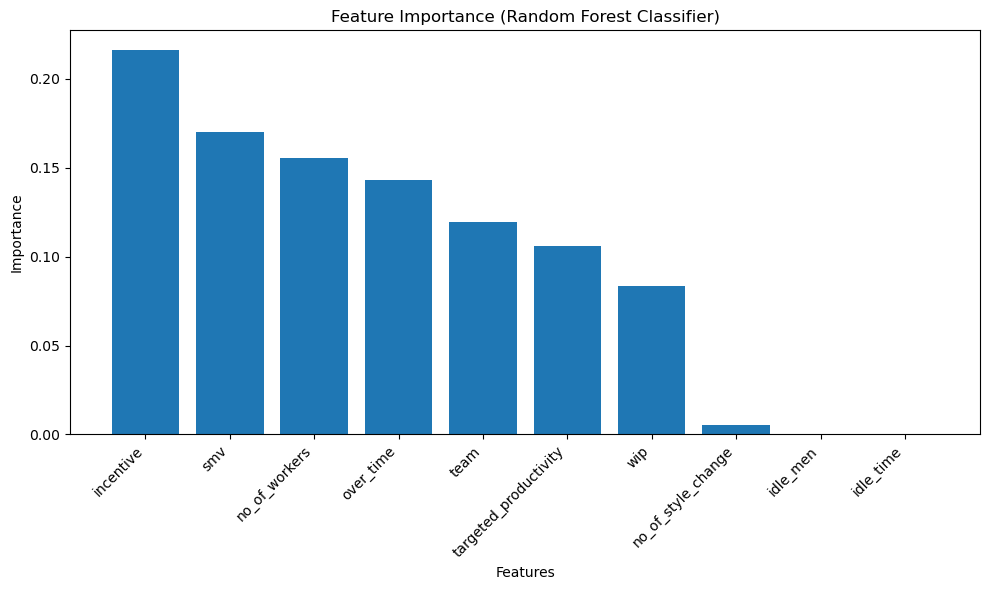

In [221]:
# TODO: Visualize the importance of features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Random Forest Classifier)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Regression using Random Forest Regressor

In [223]:
# TODO: Write your code in this cell
# TODO: use Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

X = df_cleaned.drop(['actual_productivity', 'class'], axis=1)
y = df_cleaned['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, 
    random_state=2150)

rf_reg = RandomForestRegressor(random_state=2100)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

In [224]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err and exp_var_2 variables.

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Explained variance: 0.39105268938550586
Maximum error: 3.5976576333527537


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [225]:
# TODO: Explained variance

weights = X_test['targeted_productivity']

weights = (weights - weights.min()) / (weights.max() - weights.min())
exp_var_2 = explained_variance_score(y_test, y_pred, sample_weight=weights)
exp_var_weighted = exp_var_2

print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance (Weighted): 0.3634352048994911
Explained variance (Weighted): 0.3634352048994911


Show the **importance of the features** when using **Random Forest Regressor** method.

In [226]:
# TODO: the importance of features with Random Forest Regressor
feature_importances = pd.DataFrame({
   'feature': X.columns,
   'importance': rf_reg.feature_importances_
}).sort_values('importance', ascending=False)

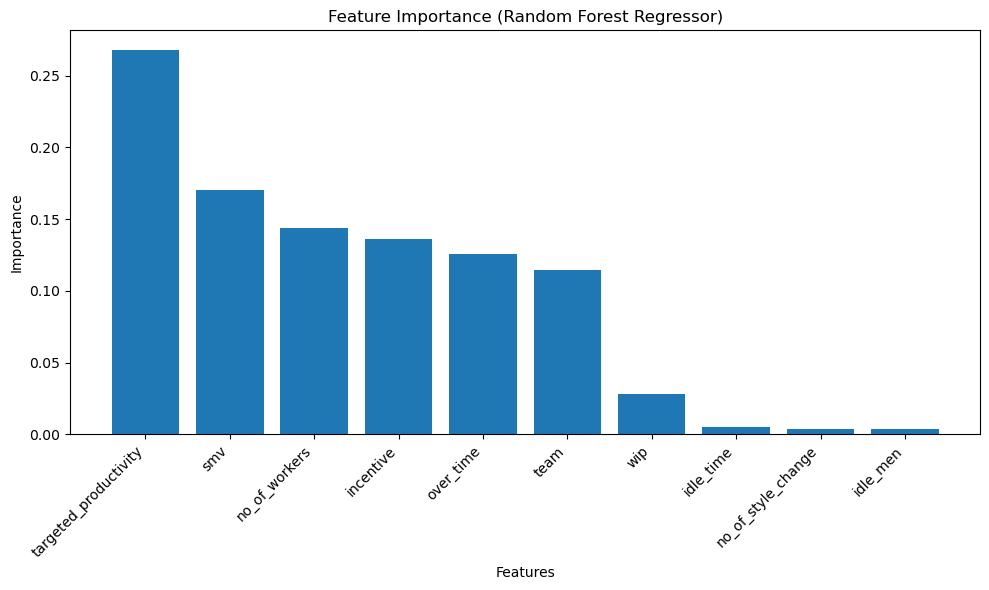

In [227]:
# TODO: Visualize the importance of features
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Random Forest Regressor)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Analysis of results

The explained variance with linear regression is 0.252, whereas it is 0.391 with random forest. Maximum error was 3.043 and 3.598 respectfully. Finally, the weighted explained variance was 0.234 with linear regression and 0.363 with random forest. The results show, that random forest performed clearly better regarding explained variance and could better model unlinear relationships. However, linear regression had a little smaller maximum error.

Other good regression models for this dataset could include gradient boosting methods, which are well suitable for unlinear relationships. Also, support vector regression work, neural networks and ensemble methods might be a good choice for this dataset.